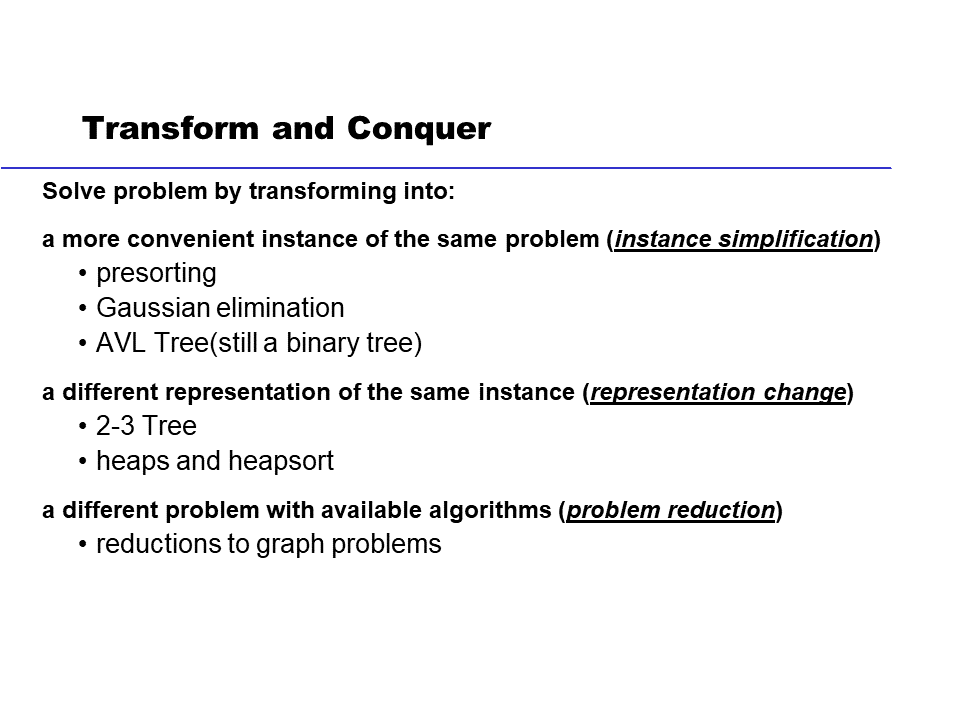

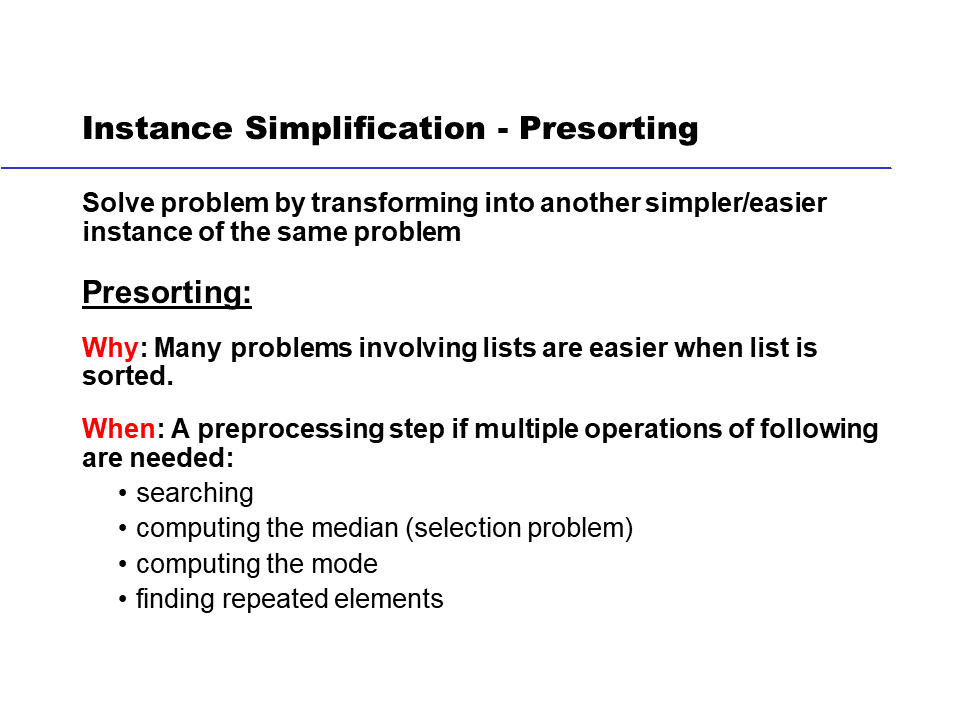

### Presorting for Searching an Array

#### Two ways to Search

- Sequential Search
    - $O(n)$
    - *unsorted*
- Binary Search
    - $O(\log n)$
    - *sorted*
    - Binary Search is *faster if input is sorted*

#### Cost of sorting?

- General, *comparison-based* sorting is $O(n\log n)$
    - Can assume any library sort is $O(n\log n)$
    - Cannot do better in general (see chapter 11 for information-theoretic argument why)  
    - Can do linear time in some situations (imagine if keys all 1-1000 over a million item array)

So, Presort to do binary search

In [22]:
import random

def rand_list(ct,start=0,step=1):
    xs = [x for x in range(start,start+ct*step,step)]
    random.shuffle(xs)
    return xs

def evens(ct):
    return rand_list(ct,2,2)

Note: Python Lists are "dynamic arrays" <a href="https://en.wikipedia.org/wiki/Dynamic_array">Wikipedia Link</a>

This is what Java ArrayLists and C++ vectors are too.

In [23]:
print(rand_list(10))

[5, 2, 6, 1, 8, 9, 3, 0, 7, 4]


In [24]:
print(rand_list(5,2,3))

[8, 5, 2, 11, 14]


Gen Random array (input) and then sort, $O(n\log n)$

In [6]:
xs = rand_list(10)
print(xs)
sxs = sorted(xs)
print('sorted:')
print(sxs)

[7, 9, 8, 2, 5, 4, 0, 6, 3, 1]
sorted:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [34]:
from  termcolor import colored

#input: sorted list of something comparable with <
#output: index of item searched for in input list or -1 if not present
def binary_search(x,xs):
    begin=0
    end=len(xs)-1 #length of xs
    while begin <= end:
        m = (begin+end)//2 # integer division
        pretty_bs(xs,x,begin,end,m) # for drawing, "pretty_X" will be my name for these functions
        y= xs[m]
        if x == y:
            return m
        elif y<x:
            begin = m+1
        else:
            end = m-1
    return -1


def pretty_bs(xs,target,begin,end,m):
    l = len(xs)
    print('[ ',end='')
    for i in range(l):
        if xs[i] == target:
            print(colored(xs[i],'yellow'),end = '')
        elif i==m:
            print(colored(xs[i],'green'),end = '')
        elif i>= begin and i<=end:
            print(colored(xs[i],'blue'),end = '')
        else:
            print(xs[i],end='')
        if(i< l-1): print(", ", end='')
    print(" ]")

print(colored('hello', 'yellow'), colored('world', 'grey'),'world')


hello world world


In [35]:
i = binary_search(2,sxs)
print(i)

[ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9 ]
[ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9 ]
[ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9 ]
2


In [36]:
es = evens(10)
print(es)

[16, 14, 10, 20, 12, 6, 18, 4, 8, 2]


In [37]:
ses = sorted(es)
print(ses)

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20]


In [38]:
i = binary_search(16,ses)
print(i)

[ 2, 4, 6, 8, 10, 12, 14, 16, 18, 20 ]
[ 2, 4, 6, 8, 10, 12, 14, 16, 18, 20 ]
7


In [39]:
i = binary_search(15,ses)
print(i)

[ 2, 4, 6, 8, 10, 12, 14, 16, 18, 20 ]
[ 2, 4, 6, 8, 10, 12, 14, 16, 18, 20 ]
[ 2, 4, 6, 8, 10, 12, 14, 16, 18, 20 ]
[ 2, 4, 6, 8, 10, 12, 14, 16, 18, 20 ]
-1
